In [1]:
#  SETUP ENVIRONMENT
# Install essential packages quietly
!pip install pandas scikit-learn seaborn matplotlib --quiet

# Import required libraries
import pandas as pd                     # For data manipulation
from sklearn.datasets import load_breast_cancer  # Dataset loader
from sklearn.ensemble import RandomForestClassifier  # Our ML model
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report)  # Evaluation metrics
import seaborn as sns                  # Visualization
import matplotlib.pyplot as plt        # Plotting

print("✅ Environment setup complete! All packages imported successfully.")

✅ Environment setup complete! All packages imported successfully.


In [2]:
# LOAD AND EXPLORE DATA
# Load the built-in breast cancer dataset
cancer_data = load_breast_cancer()

# Convert to pandas DataFrame for easier handling
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Add target variable and create priority labels
# Note: Original target is 0=malignant, 1=benign
df['diagnosis'] = cancer_data.target  # Original medical labels
df['priority'] = df['diagnosis'].map({0: 'High', 1: 'Low'})  # Our business labels

# Display dataset info
print("\n Dataset Overview:")
print(f"Total samples: {len(df)}")
print(f"Features available: {len(cancer_data.feature_names)}")
print("\n First 5 rows:")
display(df.head())

# Check class distribution
print("\n Class Distribution:")
print(df['priority'].value_counts())


 Dataset Overview:
Total samples: 569
Features available: 30

 First 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis,priority
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,High
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,High
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,High
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,High
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,High



 Class Distribution:
priority
Low     357
High    212
Name: count, dtype: int64


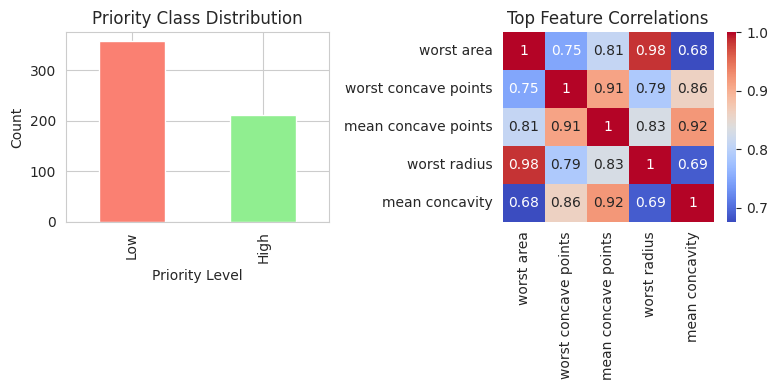

In [3]:
#  DATA VISUALIZATION
# Set style for plots
sns.set_style("whitegrid")

# Plot class distribution
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
df['priority'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title("Priority Class Distribution")
plt.xlabel("Priority Level")
plt.ylabel("Count")

# Plot feature correlation (top 5 features)
plt.subplot(1,2,2)
top_features = ['worst area', 'worst concave points', 'mean concave points',
               'worst radius', 'mean concavity']
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Top Feature Correlations")
plt.tight_layout()
plt.show()

In [4]:
#  PREPARE DATA FOR MODELING
# Separate features (X) and target (y)
X = df.drop(['diagnosis', 'priority'], axis=1)  # All medical features
y = df['priority']  # Our target labels

# Split data into training (80%) and testing (20%) sets
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintains class distribution
)

print("\n Data Split Results:")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Feature count: {X_train.shape[1]}")


 Data Split Results:
Training samples: 455
Testing samples: 114
Feature count: 30


In [5]:
#  MODEL TRAINING
# Initialize Random Forest Classifier
# n_estimators = number of decision trees in the forest
model = RandomForestClassifier(
    n_estimators=100,  # 100 trees
    random_state=42,    # For reproducibility
    class_weight='balanced'  # Handles class imbalance
)

# Train the model on our training data
model.fit(X_train, y_train)

print("\n Model Training Complete!")
print(f"Model parameters:\n{model.get_params()}")


 Model Training Complete!
Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}



 Evaluation Metrics:
Overall Accuracy: 94.74%

Detailed Report:
              precision    recall  f1-score   support

        High       0.93      0.93      0.93        42
         Low       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



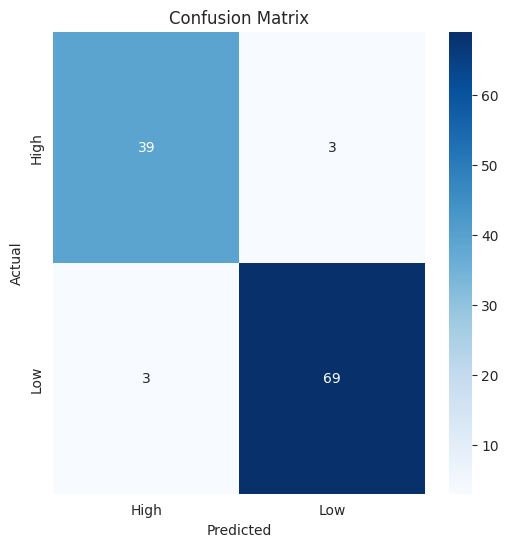

In [6]:
#  MODEL EVALUATION
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Display results
print("\n Evaluation Metrics:")
print(f"Overall Accuracy: {accuracy:.2%}")
print("\nDetailed Report:")
print(report)

# Confusion matrix visualization
plt.figure(figsize=(6,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High', 'Low'],
            yticklabels=['High', 'Low'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 Top 10 Important Features:


,Feature,Importance
23,worst area,0.150587
27,worst concave points,0.127503
7,mean concave points,0.095327
20,worst radius,0.090757
22,worst perimeter,0.077433
6,mean concavity,0.069564
2,mean perimeter,0.066677
0,mean radius,0.044556
13,area error,0.044181
3,mean area,0.037214


/tmp/ipython-input-7-3961844218.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')


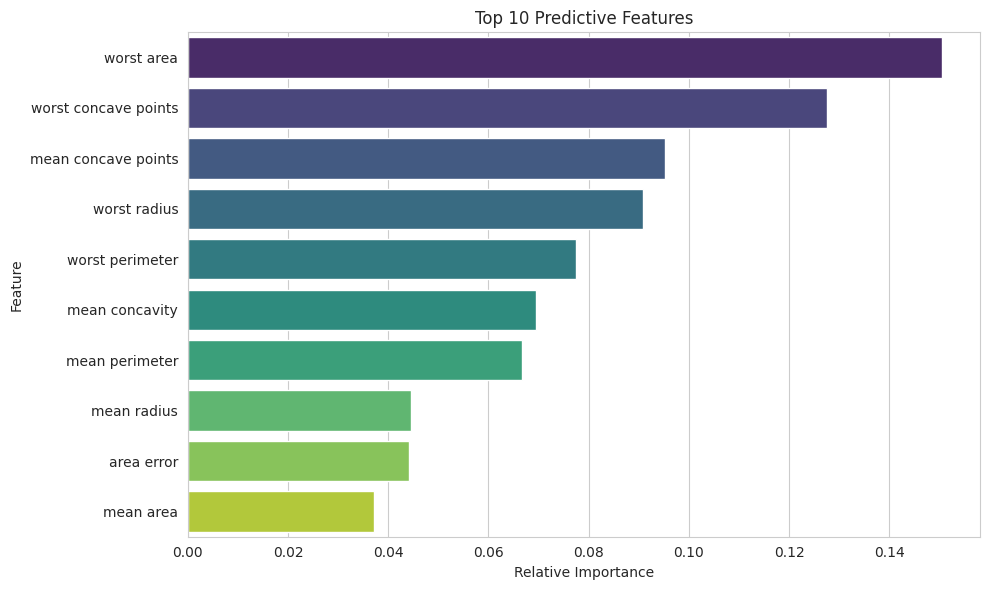

In [7]:
#  FEATURE IMPORTANCE ANALYSIS
# Get feature importances and convert to DataFrame
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Display top 10 features
print("\n Top 10 Important Features:")
display(importances.head(10))

# Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')
plt.title('Top 10 Predictive Features')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [8]:
#  PREDICTION DEMO
#  sample test case (using median values from dataset)
sample_case = pd.DataFrame([df.median(numeric_only=True)], columns=X.columns)

# Make prediction
prediction = model.predict(sample_case)
probabilities = model.predict_proba(sample_case)

print("\n Sample Prediction:")
print(f"Predicted Priority: {prediction[0]}")
print(f"Confidence: {probabilities[0].max():.2%}")
print("\nFeature Values Used:")
display(sample_case[top_features])


 Sample Prediction:
Predicted Priority: Low
Confidence: 97.00%

Feature Values Used:


,worst area,worst concave points,mean concave points,worst radius,mean concavity
0,686.5,0.09993,0.0335,14.97,0.06154
